# Advanced DataFrames Exercises Part 1

1. Run `python -m pip install pymysql` from your terminal to install the mysql client (any folder is fine)

2. cd into your exercises folder for this module and run `echo env.py >> .gitignore`
3. Create a function named `get_db_url`. It should accept a username, hostname, password, and database name and return a url connection string formatted like in the example at the start of this lesson.

3. Use your function to obtain a connection to the employees database. Once you have successfully run a query:
- Intentionally make a typo in the database url. What kind of error message do you see?
- Intentionally make an error in your SQL query. What does the error message look like?

- Read the employees and titles tables into two separate DataFrames.
- How many rows and columns do you have in each DataFrame? Is that what you expected?
- Display the summary statistics for each DataFrame.
- How many unique titles are in the titles DataFrame?
- What is the oldest date in the to_date column?
- What is the most recent date in the to_date column?

In [1]:
# import numpy for all that good mathematic application
import numpy as np
# import pandas for all that good tabular manipulation
import pandas as pd
# get the data function from pydataset to grab some extra content
from pydataset import data

In [2]:
# grab the specific stuff from your env file (but dont print it out in your notebook!!)
import env
# from env import user, host, password (if ya like)

In [3]:
# set a random seed if you want things to be repeatable when you invoke np.random calls
np.random.seed(1349)

In [4]:
import os

In [5]:
os.path.exists('env.py')

True

In [6]:
myvar1, myvar2 = (1, 5)

In [7]:
myvar1

1

In [8]:
def get_db_url(db, env_file=os.path.exists('env.py')):
    '''
    returns a formatted string ready to utilize as a sql url connection
    
    args: db: a string literal representing a schema
    env_file: bool: checks to see if there is an env.py present in the cwd
    
    make sure that if you have an env file that you import it outside of the scope 
    of this function call, otherwise env.user wont mean anything ;)
    '''
    if env_file:
        user, password, host = (env.user, env.password, env.host)
        return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    else:
        return 'yo you need some credentials to access a database usually and I dont want you to type them here.'


In [9]:
# write a test query that doesnt pull a ton of data 
# (remember you can always do this in workbench to test!!)
query = '''SELECT * FROM employees limit 10'''

In [10]:
# read in data from employee
pd.read_sql(query, get_db_url('employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [11]:
# do it for realsies
url = get_db_url("employees")
sql = """
SELECT * FROM employees
"""

employees = pd.read_sql(sql, url)
employees.shape

(300024, 6)

In [12]:
# cache the data so that we can access this dataframe in the future without having
# to ping the cloud database every time:
employees.to_csv('employees.csv', index=False)
# loading it up in the future looks like:
# employees = pd.read_csv('employees.csv')

In [13]:
sql = """
SELECT * FROM titles

"""

titles = pd.read_sql(sql, url)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [14]:
# shape of our dataframe? (rows, cols)
titles.shape

(443308, 4)

In [15]:
# descriptive statistics of our dataframe?
employees.describe()

,emp_no
count,300024.000000
mean,253321.763392
std,161828.235540
min,10001.000000
25%,85006.750000
50%,249987.500000
75%,424993.250000
max,499999.000000


In [16]:
# extra keyword agrument on describe: 'all' for include
titles.describe(include='all')

,emp_no,title,from_date,to_date
count,443308.000000,443308,443308,443308
unique,NaN,7,6393,5888
top,NaN,Engineer,1998-10-25,9999-01-01
freq,NaN,115003,132,240124
mean,253075.034430,NaN,NaN,NaN
std,161853.292613,NaN,NaN,NaN
min,10001.000000,NaN,NaN,NaN
25%,84855.750000,NaN,NaN,NaN
50%,249847.500000,NaN,NaN,NaN
75%,424891.250000,NaN,NaN,NaN


In [17]:
# How many unique titles are in the titles DataFrame?
# If we wanted an answer to this in SQL: We may answer it this way:
pd.read_sql("SELECT COUNT(DISTINCT title) AS unique_title_count from titles", url)

,unique_title_count
0,7


In [50]:
# How many unique titles are in the titles DataFrame?
# Let's answer that with pandas now:
len(titles.title.unique())

7

In [52]:
# alternatively:
len(titles['title'].value_counts())

7

In [53]:
# alternatively:
titles['title'].nunique()

7

In [19]:
# What is the oldest date in the to_date column?
# sql way:
pd.read_sql("SELECT MIN(to_date) FROM titles", url)

,MIN(to_date)
0,1985-03-01


In [20]:
# What is the most recent date in the to_date column?
# sql way:
pd.read_sql("SELECT MAX(to_date) FROM titles", url)

,MAX(to_date)
0,9999-01-01


In [ ]:
# Wait just a gosh darned second!
# if we want to interpret the date as a maximum,
# we need to tell it to cast as a date type, just like when we say .str to
# utilize a string method!

In [21]:
# pandas way:
titles.to_date.max()

datetime.date(9999, 1, 1)

In [22]:
# pandas way:
titles.to_date.min()

datetime.date(1985, 3, 1)

## Part 2 Exercises

Copy the users and roles DataFrames from the examples above.

What is the result of using a right join on the DataFrames?

What is the result of using an outer join on the DataFrames?

What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [23]:
# establish users
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [24]:
# establish roles
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


#### 2. What do you think a right join would look like? 

- Jane and Mike are not included because they had NaN values in the foreign key column, `role_id`.


- The `commenter` role is included even through it is not present in the left table in the join.


- A right join uses only the keys from the right DataFrame.
    - If I set `indicator=True`, I can get a good picture of which rows are coming from where.
    - Notice that I only get back rows that are in `both` or `right_only` in a right join.

In [55]:
# pd.merge?

In [ ]:
'''
YO CHECK OUT THESE SWEET MERGE DOCS
pd.merge? sez:

indicator : bool or str, default False
    If True, adds a column to the output DataFrame called "_merge" with
    information on the source of each row. The column can be given a different
    name by providing a string argument. The column will have a Categorical
    type with the value of "left_only" for observations whose merge key only
    appears in the left DataFrame, "right_only" for observations
    whose merge key only appears in the right DataFrame, and "both"
    if the observation's merge key is found in both DataFrames.

'''

In [ ]:
# lets do that! the one that tells us exactly what the sided joins doing!

In [25]:
# note that we define if we are doing a right or a left join inside of the how arg!
# left_on and right_on denote our key pair
right_join = pd.merge(users, 
                      roles, 
                      left_on='role_id', 
                      right_on='id', 
                      how='right',
                      indicator=True)
right_join

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1,admin,both
1,2.0,joe,2.0,2,author,both
2,3.0,sally,3.0,3,reviewer,both
3,4.0,adam,3.0,3,reviewer,both
4,NaN,NaN,NaN,4,commenter,right_only


In [26]:
# I can use method chaining to make my resulting DataFrame how I want.
# we will transform the dataframe output by the merge with a .rename after a .drop,
# mapping new cleaner names to the columns we want to keep and removing the one we 
# do not want
clean_right = pd.merge(users, 
                    roles, 
                    left_on='role_id', 
                    right_on='id', 
                    how='right').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                                         'name_x': 'employee',
                                                                         'id_y': 'role_id',
                                                                         'name_y': 'role'}
                                                                )
clean_right

,id,employee,role_id,role
0,1.0,bob,1,admin
1,2.0,joe,2,author
2,3.0,sally,3,reviewer
3,4.0,adam,3,reviewer
4,NaN,NaN,4,commenter


#### 3. What would an outer join look like? 
- This returns a DataFrame with all of the rows from both tables.


- Again, setting `indicator=True` allows me to see exactly what's happening here.
    - In outer join, I receive rows that are in `both`, `left_only`, and `right_only`.
    - Basically, I get all of the rows from both DataFrames.

In [27]:
pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer',
        indicator=True)

,id_x,name_x,role_id,id_y,name_y,_merge
0,1.0,bob,1.0,1.0,admin,both
1,2.0,joe,2.0,2.0,author,both
2,3.0,sally,3.0,3.0,reviewer,both
3,4.0,adam,3.0,3.0,reviewer,both
4,5.0,jane,NaN,NaN,NaN,left_only
5,6.0,mike,NaN,NaN,NaN,left_only
6,NaN,NaN,NaN,4.0,commenter,right_only


In [56]:
# looks like it gives us the values that are left_only *and* right only! A NaN fiesta!

In [28]:
# clean it up a little!
pd.merge(users, 
         roles, 
         left_on='role_id', 
         right_on='id', 
         how='outer').drop(columns='role_id').rename(columns={'id_x': 'id', 
                                                            'name_x': 'employee',
                                                            'id_y': 'role_id',
                                                            'name_y': 'role'}
                                                    )

,id,employee,role_id,role
0,1.0,bob,1.0,admin
1,2.0,joe,2.0,author
2,3.0,sally,3.0,reviewer
3,4.0,adam,3.0,reviewer
4,5.0,jane,NaN,NaN
5,6.0,mike,NaN,NaN
6,NaN,NaN,4.0,commenter


#### 4. What happens if you drop the foreign keys from the DataFrames and try to merge them?

In [57]:
# bad idea to do this!

# pd.merge(users, 
#          roles, 
#          left_on='id', 
#          right_on='id', 
#          how='outer',
#         indicator=True)

#### 5.  Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [30]:
# Output and read the documentation for the mpg dataset.
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [31]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [32]:
# How many rows and columns are in the dataset?
mpg.shape

(234, 11)

In [33]:
# mpg.rename(columns = {'cty': 'city', 'hwy':'highway'})

In [59]:
mpg.columns

Index(['manufacturer', 'model', 'displacement', 'year', 'cylinders',
       'transmission', 'drive', 'city', 'highway', 'fuel', 'class',
       'mileage_difference', 'average_mileage', 'is_automatic',
       'transmission_category'],
      dtype='object')

In [34]:
mpg.columns.tolist()

['manufacturer',
 'model',
 'displ',
 'year',
 'cyl',
 'trans',
 'drv',
 'cty',
 'hwy',
 'fl',
 'class']

In [58]:
list(mpg)

['manufacturer',
 'model',
 'displacement',
 'year',
 'cylinders',
 'transmission',
 'drive',
 'city',
 'highway',
 'fuel',
 'class',
 'mileage_difference',
 'average_mileage',
 'is_automatic',
 'transmission_category']

In [35]:
mpg.columns = ['manufacturer', 'model', 'displacement', 'year', 'cylinders', 'transmission', 'drive', 'city','highway', 'fuel', 'class']

#### 10. How many different manufacturers are there?

In [36]:
# I can use the `.nunique()` function to count the unique values in the column.

mpg.manufacturer.nunique()

15

#### 11. How many different models are there?

In [37]:
mpg.model.unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [38]:
mpg.model.nunique()

38

#### 12 & 13. Create a column named mileage_difference like you did in the DataFrames exercises; this column should contain the difference between highway and city mileage for each car. Also average_mileage

In [61]:
# aw shucks we did this before! time to do it again
mpg['mileage_difference'] = mpg.highway - mpg.city

#create new column called average mileage
# remember the whole 2 / ((1/x) + (1/y)) thing is the harmonic mean
# its technically the correct average for rates,
# which is the best kind of correct,
# so im going to use it here.
# feel free to use the arithmetic mean of mpg.highway + mpg.city / 2.
mpg['average_mileage'] = round(2 / ((1/mpg.highway) + (1/mpg.city)), 2)

mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage,is_automatic,transmission_category
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,22.21,True,automatic
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,24.36,False,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,24.31,False,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,24.71,True,automatic
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,19.81,True,automatic


#### 14. Create a new column on the mpg dataset named is_automatic that holds boolean values denoting whether the car has an automatic transmission.

In [40]:
# peep these sick transmission values
mpg.transmission.unique()

array(['auto(l5)', 'manual(m5)', 'manual(m6)', 'auto(av)', 'auto(s6)',
       'auto(l4)', 'auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'],
      dtype=object)

In [41]:
# create a new column is_automatic
# remember the thing about using string methods!!!! (add str!)
mpg['is_automatic'] = mpg.transmission.str.contains('auto')

mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True


#### 15. On average, which manufacturer has the best miles per gallon?

- I'll look at this question in a couple of different ways.


- The main takeaway here:  
    - we can use the `.groupby()` method on a column and perform an aggregation on another, or other, column(s).


- I can look at the highest average for `average_mileage` by `manufacturer` as a target.



In [43]:
# Here I perform my groupby and aggregation and sort the values.
# We're throwing a sort_values on top of our group by here using chaining:
mpg.groupby('manufacturer').average_mileage.mean().sort_values(ascending = False)

manufacturer
honda         28.500000
volkswagen    25.074074
hyundai       22.750000
subaru        22.428571
audi          22.027778
toyota        21.720588
pontiac       21.700000
nissan        21.346154
chevrolet     18.447368
ford          16.680000
mercury       15.625000
jeep          15.562500
dodge         15.540541
lincoln       14.166667
land rover    14.000000
Name: average_mileage, dtype: float64

In [44]:
# Here I perform my groupby and aggregation with .nlargest().
mpg.groupby('manufacturer').average_mileage.mean().nlargest(n = 1, keep = 'all')


manufacturer
honda    28.5
Name: average_mileage, dtype: float64

#### 16. Do automatic or manual cars have better miles per gallon?

- I'm going to create a column, `transmission_category`, that contains `auto` if a car has any type of automatic transmission 
- and `manual` if a car has any type of manual transmission. 
    
    
- Now, I can use `transmission_category` to group my data by automatic or manual transmission.


In [45]:
# create new column transmission_category using np.where
# np.where(condition, 'This', 'That')

mpg['transmission_category']= np.where(
    mpg.transmission.str.contains('auto'), 'automatic', 'manual')
mpg.head()

,manufacturer,model,displacement,year,cylinders,transmission,drive,city,highway,fuel,class,mileage_difference,average_mileage,is_automatic,transmission_category
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,23.5,True,automatic
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,25.0,False,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,25.5,False,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,25.5,True,automatic
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,21.0,True,automatic


In [46]:
# group by transmissons category
mpg.groupby('transmission_category')[['average_mileage']].mean().round(1)

,average_mileage
transmission_category,
automatic,19.1
manual,22.2


### 3. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [47]:
query = '''
                     SELECT *
                     FROM orders;
                     '''

In [48]:
orders = pd.read_sql(query, get_db_url('chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


#### 2. What is the total price for each order?

- `item_price` is an object, so before I can treat it like a float, I have to clean it up.

#### 3. What are the most popular 3 items?


- Basically, which three items are ordered the most.**

#### 4. Which item has produced the most revenue?


- We found that  `item_price` is really like a calulation of the quantity of an item in an order times the item's price.

#### 5. Join the employees and titles DataFrames together.

#### 6. For each title, find the hire date of the employee that was hired most recently with that title.

In [49]:
# How to merge the output of dataframe above to get employees names and other info in same dataframe?


#### 1. 

Use your get_db_url function to help you explore the data from the chipotle database.

In [53]:
chipotle_sql_query = '''
                     SELECT *
                     FROM orders;
                     '''

In [54]:
orders = pd.read_sql(chipotle_sql_query, get_db_url('chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [55]:
# Check the size of the data I'm bringing in.

orders.shape

(4622, 6)

In [56]:
# Look at the non-null values and data types of my columns.

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


#### 2. 

What is the total price for each order?

- **Order, `order_id`, is our dimension, and the total price, `item_price.sum()` is our metric.**


- `item_price` is an object, so before I can treat it like a float, I have to clean it up.

In [57]:
# Reassign my cleanup to item_price in my df.

orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


<ipython-input-57-641dcc946cd3>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)


In [58]:
order_totals = orders.groupby('order_id').item_price.sum()
order_totals.sample(10)

order_id
233     29.75
1671    13.25
827     11.38
1502    23.50
829     12.95
1042    12.39
1832    13.20
1525    15.74
1069    12.75
760     22.50
Name: item_price, dtype: float64

___

#### 3. 

What are the most popular 3 items?

- **Items, `item_name`, is our dimension, and the total number ordered, `quantity.sum()` is our metric.**


- Basically, which three items are ordered the most.**

In [63]:
top_three = orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)
top_three

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

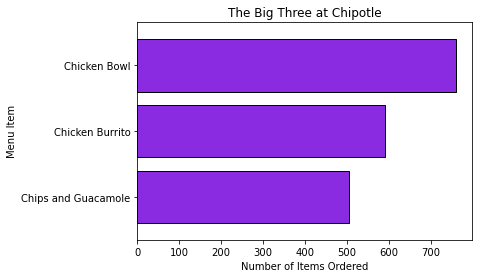

In [64]:
top_three.plot(kind='barh',
             color='blueviolet', 
             ec='black', 
             width=.8)

plt.title('The Big Three at Chipotle')
plt.xlabel('Number of Items Ordered')
plt.ylabel('Menu Item')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

___

#### 4. 

Which item has produced the most revenue?

- **Items, `item_name`, is our dimension, and a total of price, `item_price`.sum(), is our metric.**


- With a little investigating, we see that `item_price` is really like a calulation of the quantity of an item in an order times the item's price. This confused me at first, so make sure to get to know your data a little before you dig in.

In [65]:
orders.sample(5)

,id,order_id,quantity,item_name,choice_description,item_price
1108,1109,458,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]",8.75
797,798,327,1,Veggie Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Rice, Sour Cream, Guacamole, Lettuce]]",11.25
1107,1108,457,1,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Sour Cream, Lettuce]]",8.75
2875,2876,1142,1,Steak Burrito,"[Tomatillo-Red Chili Salsa (Hot), [Pinto Beans, Cheese, Sour Cream, Lettuce]]",8.99
4437,4438,1768,1,Carnitas Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacam...",11.75


In [66]:
# I can return the item(s) with the highest revenue using .nlargest().

orders.groupby('item_name').item_price.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [67]:
# This way I get just the item name with the highest revenue.

orders.groupby('item_name').item_price.sum().nlargest(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [68]:
# I could sort my values and return the top ones using .head() if I wanted.

orders.groupby('item_name').item_price.sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

___

#### 5. 

Join the employees and titles dataframes together.
```python
left_df.merge(left_df, right_df, how='inner', on=None, left_on=None, right_on=None)
```

In [69]:
employees.shape

(300024, 6)

In [70]:
titles.shape

(443308, 4)

In [71]:
# Merge the DataFrames into all_emp_titles.

all_emp_titles = employees.merge(titles, on='emp_no')
all_emp_titles.shape

(443308, 9)

In [72]:
# Peek at DataFrame.

all_emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [73]:
all_emp_titles.shape

(443308, 9)

In [74]:
all_emp_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      443308 non-null  int64 
 1   birth_date  443308 non-null  object
 2   first_name  443308 non-null  object
 3   last_name   443308 non-null  object
 4   gender      443308 non-null  object
 5   hire_date   443308 non-null  object
 6   title       443308 non-null  object
 7   from_date   443308 non-null  object
 8   to_date     443308 non-null  object
dtypes: int64(1), object(8)
memory usage: 33.8+ MB


___

. 

Visualize how frequently employees change titles.

- As always, there are different ways to approach and code this. This is my take.


- **emp_no is our dimension and a count of titles is our metric.**


- If the frequency of emp_no == 1, then the employee has only ever held 1 title, which means that employee has never changed titles.


- If the frequency of emp_no == 2, then the employee has held 2 titles, which means that employee has changed titles 1 time.


- If the frequency of emp_no == 3, then the employee has held 3 titles. You know the drill.

In [75]:
# emp_no is our dimension and count of title is our metric.

all_emp_titles.groupby('emp_no').title.count().sample(10)

emp_no
233853    3
203626    2
289619    2
451981    2
433491    1
95086     1
407452    1
444072    2
270443    1
406173    1
Name: title, dtype: int64

In [76]:
# Now let's get a count of the values above; we can use value_counts()

all_emp_titles.groupby('emp_no').title.count().value_counts()

1    159754
2    137256
3      3014
Name: title, dtype: int64

___

#### 6. 

For each title, find the hire date of the employee that was hired most recently with that title.

- **Title is our dimension, and the max of the hire dates, hire_date.max() is our metric.**

In [80]:
all_emp_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

___

In [93]:
# Using .max() on a string returns the maximum alphabetical character from the string.

x = pd.Series(['John', 'Madeleine', 'Ryan'])
x.max()

'Ryan'

In [94]:
# It works on these strings, too.

y = pd.Series(['1999-12-24', '1999-12-31'])
y.max()

'1999-12-31'

#### 7. 

Write the code necessary to create a cross tabulation of the number of titles by department.

<div class="alert alert-block alert-info"><b>Hint:</b> This will involve a combination of SQL and python/pandas code.</div>


In [83]:
dept_title_query = '''

                    SELECT t.emp_no, 
                    t.title, 
                    t.from_date, 
                    t.to_date, 
                    d.dept_name 
                    FROM departments AS d 
                    JOIN dept_emp AS de USING(dept_no) 
                    JOIN titles AS t USING(emp_no);

                    '''

In [84]:
# Code that reads in my data from the database.

dept_titles = pd.read_sql(dept_title_query, get_db_url('employees'))
dept_titles.head()

,emp_no,title,from_date,to_date,dept_name
0,10011,Staff,1990-01-22,1996-11-09,Customer Service
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
2,10038,Staff,1989-09-20,1996-09-20,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
4,10049,Staff,1992-05-04,2000-05-04,Customer Service


In [85]:
dept_titles.shape

(489903, 5)

In [86]:
# Code that writes my data to a csv file for faster access.

# dept_titles.to_csv('dept_titles.csv')

In [87]:
# Read in data from a CSV file instead of repeatedly hitting database.

#dept_titles = pd.read_csv('data/dept_titles.csv', index_col=0)
#dept_titles.head()

In [88]:
# Create a frequency table of titles by department

all_titles_crosstab = pd.crosstab(dept_titles.dept_name, dept_titles.title)
all_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


___

In [89]:
# Create a subset of only titles currently held by employees

current_titles = dept_titles[dept_titles.to_date == dept_titles.to_date.max()]
current_titles.head(1)

,emp_no,title,from_date,to_date,dept_name
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service


In [90]:
# This cuts my row count down from (489903, 5) to the below.

current_titles.shape

(265332, 5)

In [91]:
# Create a frequency table of titles by department

current_titles_crosstab = pd.crosstab(current_titles.dept_name, current_titles.title)
current_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


**Maybe you just want to find the max number in each row (department name) quickly.**

In [92]:
current_titles_crosstab.style.highlight_max(axis=1)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0
